# Plots for a flash-talk at JLAB 22 GeV upgrade workshop

last edit Jan-20, 2023

## Imports and definitions

In [1]:
import sys; 
software_path = '/Users/erezcohen/Desktop/Software/'
sys.path.insert(0, software_path + '/mySoftware/Python/');
sys.path.insert(0, software_path + '/CLAS12/BAND/SIDIS_at_BAND/PythonAnalysis/AcceptanceCorrections/');
sys.path.insert(0, software_path + '/CLAS12/BAND/SIDIS_at_BAND/PythonAnalysis/python_auxiliary/');
from my_tools                     import *; 
from plot_tools                   import *;
from my_data_analysis_tools       import *;
from acceptance_correction_tools  import *;
from sidis_analysis_tools         import *;

In [2]:
%config InlineBackend.figure_format = 'retina'
plt.rcParams['mathtext.fontset']    = 'stix'
plt.rcParams['font.family']         = 'STIXGeneral'

In [73]:
# PhysRevC.85.015202 Table XI
JLAB2012_data = pd.read_csv('/Users/erezcohen/Desktop/Projects/BAND/SIDIS/JLAB2012/JLAB2012_r_Table11.csv',names=['z','r','r_err'],header=0)
JLAB2012_data['Q2'] = 2.3
JLAB2012_data['Q2_min'] = 2.2
JLAB2012_data['Q2_max'] = 2.4

# PhysRevC.85.015202 TABLE XII
JLAB2012_x0263_data = pd.DataFrame({'z':0.55,'R':0.4008,'R_err':0.0341,'Q2':1.85,'Q2_min':1.84,'Q2_max':1.86},index=[])

# [B. Hommez, Ph.D. Dissertation, Ghent University (2003), unpublished]
HERMES2000_data = pd.read_csv('/Users/erezcohen/Desktop/Projects/BAND/SIDIS/HERMES2000/HERMES2000.csv',names=['z','r','r_err'], header=0)
HERMES2000_data['Q2'] = 1.85
HERMES2000_data['Q2_min'] = 1.01
HERMES2000_data['Q2_max'] = 7



Cornell77_xB_024_Q2_20_data = pd.read_csv('/Users/erezcohen/Desktop/Projects/BAND/SIDIS/JLAB2012/Cornell77_xB_0.24_Q2_2.0.csv',names=['z','R'])
# Cornell77 with manual errorbar estimation
Cornell77_xB_024_Q2_20_data['z_err'] = [0.04,0.02]
Cornell77_xB_024_Q2_20_data['R_err'] = [0.1,0.1]
(Cornell77_xB_024_Q2_20_data['r'],Cornell77_xB_024_Q2_20_data['r_err'],_) = get_r_from_CrossSectionRatio(Cornell77_xB_024_Q2_20_data['R'], Cornell77_xB_024_Q2_20_data['R_err'], Cornell77_xB_024_Q2_20_data['R_err'])
Cornell77_xB_024_Q2_20_data['Q2'] = 2.0
Cornell77_xB_024_Q2_20_data['Q2_min'] = 1.9
Cornell77_xB_024_Q2_20_data['Q2_max'] = 2.1

# Cornell77 with manual errorbar estimation
Cornell77_xB_05_Q2_40_data = pd.read_csv('/Users/erezcohen/Desktop/Projects/BAND/SIDIS/JLAB2012/Cornell77_xB_0.5_Q2_4.0.csv',names=['z','R'])
Cornell77_xB_05_Q2_40_data['z_err'] = [0.04,0.02]
Cornell77_xB_05_Q2_40_data['R_err'] = [0.1,0.3]
(Cornell77_xB_05_Q2_40_data['r'],Cornell77_xB_05_Q2_40_data['r_err'],_) = get_r_from_CrossSectionRatio(Cornell77_xB_05_Q2_40_data['R'], Cornell77_xB_05_Q2_40_data['R_err'], Cornell77_xB_05_Q2_40_data['R_err'])
Cornell77_xB_05_Q2_40_data['Q2'] = 4.0
Cornell77_xB_05_Q2_40_data['Q2_min'] = 3.9
Cornell77_xB_05_Q2_40_data['Q2_max'] = 4.1

In [74]:
def plot_existing_data(var='r',x0=0.32,z0=0.5):
    '''
    var 'r', 'R', 'r(Q^2,x=x0,z=z0)'
    
    '''
    if var=='r':
        plt.errorbar( x=JLAB2012_data.z, y=JLAB2012_data.r, yerr=JLAB2012_data.r_err, 
                     markersize=10, capsize=0,capthick=2,
                         marker='s', color=[1,0,0.], markeredgecolor=[0,0,0],linestyle='None', label='JLAB 2012,   $x=0.32, Q^2=2.3, W=2.4$')

        plt.errorbar( x=HERMES2000_data.z, y=HERMES2000_data.r, yerr=HERMES2000_data.r_err, 
                     markersize=10, capsize=0,capthick=2,
                     marker='o', color='k', markerfacecolor='forestgreen',
                     linestyle='None', 
                     label='HERMES 2000, $x=0.32, Q^2>1, W>3.3$')


        plt.errorbar( x=Cornell77_xB_024_Q2_20_data.z, y=Cornell77_xB_024_Q2_20_data.r, 
                     xerr=Cornell77_xB_024_Q2_20_data.z_err, yerr=Cornell77_xB_024_Q2_20_data.r_err, 
                     markersize=15,linestyle='None',
                    marker='^', color='k', markerfacecolor='k',
                    label='Cornell 1977, $x=0.24, Q^2=2.0, W=2.7$')

        plt.errorbar( x=Cornell77_xB_05_Q2_40_data.z, y=Cornell77_xB_05_Q2_40_data.r, 
                     xerr=Cornell77_xB_05_Q2_40_data.z_err, yerr=Cornell77_xB_05_Q2_40_data.r_err, 
                     markersize=15,linestyle='None',
                    marker='^', color='k',markerfacecolor='w',
                    label='Cornell 1977, $x=0.50, Q^2=4.0, W=2.7$')
        
    elif var=='r(Q^2,x=x0,z=z0)':
        if np.abs( x0-0.32 ) < 0.01:
            JLAB2012_z0 = JLAB2012_data[np.abs(JLAB2012_data.z - z0) < 0.015]
            plt.errorbar( x=JLAB2012_z0.Q2, xerr=[JLAB2012_z0.Q2-JLAB2012_z0.Q2_min,JLAB2012_z0.Q2_max - JLAB2012_z0.Q2], 
                          y=JLAB2012_z0.r, yerr=JLAB2012_z0.r_err, 
                         markersize=10, capsize=0,capthick=2,
                             marker='s', color=[1,0,0.], markeredgecolor=[0,0,0],linestyle='None', label='JLAB 2012,   $x=0.32, Q^2=2.3, W=2.4$')
            

        
        if np.abs( x0-0.32 ) < 0.01:
            HERMES2000_data_z0 = HERMES2000_data[np.abs(HERMES2000_data.z - z0) < 0.015]
            plt.errorbar( x=HERMES2000_data_z0.Q2, 
                         # xerr=[HERMES2000_data_z0.Q2-HERMES2000_data_z0.Q2_min,HERMES2000_data_z0.Q2_max - HERMES2000_data_z0.Q2], 
                         y=HERMES2000_data_z0.r, yerr=HERMES2000_data_z0.r_err, 
                         markersize=10, capsize=0,capthick=2,
                         marker='o', color='k', markerfacecolor='forestgreen',
                         linestyle='None', 
                         label='HERMES 2000, $x=0.32, Q^2>1, W>3.3$')

        if np.abs( x0-0.24 ) < 0.01:
            Cornell77_xB_024_Q2_20_data_z0 = Cornell77_xB_024_Q2_20_data[np.abs(Cornell77_xB_024_Q2_20_data.z - z0) < 0.02]
            plt.errorbar( x=Cornell77_xB_024_Q2_20_data_z0.Q2, 
                         xerr=[Cornell77_xB_024_Q2_20_data_z0.Q2-Cornell77_xB_024_Q2_20_data_z0.Q2_min,Cornell77_xB_024_Q2_20_data_z0.Q2_max - Cornell77_xB_024_Q2_20_data_z0.Q2], 
                         y=Cornell77_xB_024_Q2_20_data_z0.r, 
                         yerr=Cornell77_xB_024_Q2_20_data_z0.r_err, 
                         markersize=15,linestyle='None',
                        marker='^', color='k', markerfacecolor='k',
                        label='Cornell 1977, $x=0.24, Q^2=2.0, W=2.7$')
        if np.abs( x0-0.24 ) < 0.01:
            Cornell77_xB_05_Q2_40_data_z0 = Cornell77_xB_05_Q2_40_data[np.abs(Cornell77_xB_05_Q2_40_data.z - z0) < 0.02]
            plt.errorbar( x=Cornell77_xB_05_Q2_40_data_z0.Q2, 
                         xerr=[Cornell77_xB_05_Q2_40_data_z0.Q2-Cornell77_xB_05_Q2_40_data_z0.Q2_min,Cornell77_xB_05_Q2_40_data_z0.Q2_max - Cornell77_xB_05_Q2_40_data_z0.Q2],                      
                         y=Cornell77_xB_05_Q2_40_data_z0.r, 
                         yerr=Cornell77_xB_05_Q2_40_data_z0.r_err, 
                         markersize=15,linestyle='None',
                        marker='^', color='k',markerfacecolor='w',
                        label='Cornell 1977, $x=0.50, Q^2=4.0, W=2.7$')                
    return

## Simulations by Harut A.

The numbers for the first version of your plot with 0.24<x<0.4 are below:
first column is the <Q^2>, the last is the error from statistics, which I divided by two in the plot attached (using the value 0.33 and error from last column=sqrt(1/N^pi+rec)/2). 
I basically normalized the error bars of 22 GeV to 10.6 GeV making them equal for Q^2 ~3.5 GeV^2 for the same run time. That is related to loss of lower Q^2 because we use the same polar angle coverage of existing CLAS12.
That was checked for other SIDIS processes, and holds both for e\piX and e\pi\piX).
If you send me the table of your values I can make the final projection plot. You can try to make your own version, using the logic above or
 calculating more precisely the error on r from the table below. One weird thing I noticed, is that in the reconstructed sample the r tends to go down with Q^2 in MC. 
That we will investigate in more details for the 10.6 GeV MC, where the PID for pi+ and pi- is better defined.

In [160]:
Sim_22GeV_024_x_040_z_05 = pd.read_csv('/Users/erezcohen/Desktop/Projects/BAND/SIDIS/JLAB22GeV_simulations_HarutA/r_vs_Q2_0.24_xB_0.40_z_0.5.csv')
Sim_22GeV_024_x_040_z_05['Q2']     = Sim_22GeV_024_x_040_z_05['<Q^2>           ']
Sim_22GeV_024_x_040_z_05['R']      = Sim_22GeV_024_x_040_z_05['N^pi+rec/N^pi-rec']
Sim_22GeV_024_x_040_z_05['R_err']  = Sim_22GeV_024_x_040_z_05['R'] * np.sqrt(  1/Sim_22GeV_024_x_040_z_05['   N^pi+rec   '] 
                                                                             + 1/Sim_22GeV_024_x_040_z_05['  N^pi-rec'])

[Sim_22GeV_024_x_040_z_05['r'],
 Sim_22GeV_024_x_040_z_05['r_errup'],
 Sim_22GeV_024_x_040_z_05['r_errdw']]  = get_r_from_CrossSectionRatio(R = Sim_22GeV_024_x_040_z_05['R'], 
                                                              R_errup = Sim_22GeV_024_x_040_z_05['R_err'],
                                                              R_errdw = Sim_22GeV_024_x_040_z_05['R_err'])
# Sim_22GeV_024_x_040_z_05

## (1) Load data

In [3]:
subdirname = "sidisdvcs_27Oct2022_commit_2fe215f" 
e_e_pi,_,_ = load_SIDIS_data( Nruns = -1, 
                subdirname = subdirname,
                do_e_e_pi_n=False, do_e_e_pi_FreeP=False, fdebug=0 );

Done loading files.


## (2) Apply selection cuts not previously imposed

In [4]:
import time

In [5]:
print('number of pi+ events: %.1f'%(len(e_e_pi['piplus'])/1e6),'M')

number of pi+ events: 26.6 M


In [6]:
Nevents = -1
t0= time.time()
e_e_pi_pass_cuts,_,_,_ = apply_further_selection_cuts_to_data(fdebug=0, NeventsMax=Nevents);
t1 = time.time() 
print("Time elapsed: %.2f"%(t1 - t0), 'sec (%g us/event)'%((t1 - t0)/Nevents*1.e6)) # CPU seconds elapsed (floating point)

Applying selection cuts not previously imposed
Apply a π+/π- acceptance matching cut on the in p-theta plane


/Users/erezcohen/Desktop/Software//CLAS12/BAND/SIDIS_at_BAND/PythonAnalysis/python_auxiliary/sidis_analysis_tools.py:597: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_after_cut = df_after_cut.append(df_in_sector_pass_cut);
/Users/erezcohen/Desktop/Software//CLAS12/BAND/SIDIS_at_BAND/PythonAnalysis/python_auxiliary/sidis_analysis_tools.py:597: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_after_cut = df_after_cut.append(df_in_sector_pass_cut);
/Users/erezcohen/Desktop/Software//CLAS12/BAND/SIDIS_at_BAND/PythonAnalysis/python_auxiliary/sidis_analysis_tools.py:597: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_after_cut = df_after_cut.append(df_in_sector_pass_cut);
/Users/erezcohen/Desktop/Software//CLAS12/BAND/SIDIS

Apply a cut on the missing mass of a (e,e'π) reaction: 1.3<Mx<5.0 GeV/c2
(e,e π+ )
26562112 events after original cut (100.0 %)
18060926 events after p-theta cut (68.0 %)
17092900 events after Mx cut (64.4 %)
17053717 events after Kinematical cut (64.2 %)
(e,e π- )
11055256 events after original cut (100.0 %)
10705555 events after p-theta cut (96.8 %)
10289330 events after Mx cut (93.1 %)
10265290 events after Kinematical cut (92.9 %)
 
Done applying event-selection cuts
Time elapsed: 98.41 sec (-9.84102e+07 us/event)


## (3) Extract $\pi^\pm$ cross-section ratio as a function of $x_B$

Harut wants 0.25<x<0.3 and relax a little bit the z-cut

In [169]:
z_bins   = np.arange(0.3,0.85,0.05)
z_widths = 0.01*np.ones(len(z_bins)) # 0.025
for z_bin,z_width in zip(z_bins,z_widths):
    z_min,z_max = z_bin-z_width, z_bin+z_width
    print('%.3f < z < %.3f'%(z_min,z_max))
print()
x_bins   = np.linspace(0.22,0.62,11)
x        = (x_bins[1:] + x_bins[:-1])/2
x_err    = (x_bins[1:] - x_bins[:-1])/2
for x_min,x_max in zip(x_bins[:-1],x_bins[1:]):#{
    print('%.3f < x < %.3f'%(x_min,x_max))    

0.290 < z < 0.310
0.340 < z < 0.360
0.390 < z < 0.410
0.440 < z < 0.460
0.490 < z < 0.510
0.540 < z < 0.560
0.590 < z < 0.610
0.640 < z < 0.660
0.690 < z < 0.710
0.740 < z < 0.760
0.790 < z < 0.810

0.220 < x < 0.260
0.260 < x < 0.300
0.300 < x < 0.340
0.340 < x < 0.380
0.380 < x < 0.420
0.420 < x < 0.460
0.460 < x < 0.500
0.500 < x < 0.540
0.540 < x < 0.580
0.580 < x < 0.620


In [170]:
data_path= '/Users/erezcohen/Desktop/data/BAND/Results/FlashTalkJLAB22GeV_Jan2023/'
var,var_label,xlabel = 'xB',"standing proton x","Bjorken $x$"

In [171]:

Q2_min_arr = np.arange(2,7,0.5)
Q2_max_arr = Q2_min_arr + 0.5

for Q2_min,Q2_max in zip(Q2_min_arr,Q2_max_arr):
    suffix   = '_%.1f_Q2_%.1f'%(Q2_min,Q2_max)
    print(suffix)
    extract_SIDIS_ratio(df_dict  = e_e_pi_pass_cuts, 
                        x_var    = var ,
                        x_bins   = x_bins,
                        z_bins   = z_bins,
                        z_widths = z_widths,          
                        fdebug   = 0,
                        data_path= data_path,
                        prefix   = 'Untagged_SIDIS_ratio_',                    
                        suffix   = suffix,
                        Q2_min   = Q2_min,
                        Q2_max   = Q2_max
                       )
print('done.')

_2.0_Q2_2.5
_2.5_Q2_3.0
_3.0_Q2_3.5
_3.5_Q2_4.0
_4.0_Q2_4.5
_4.5_Q2_5.0
_5.0_Q2_5.5
_5.5_Q2_6.0
_6.0_Q2_6.5
_6.5_Q2_7.0
done.


/opt/homebrew/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/opt/homebrew/lib/python3.10/site-packages/numpy/core/_methods.py:188: RuntimeWarning: invalid value encountered in divide
  ret = arr.dtype.type(ret / rcount)


## Load results and plot $r(Q^2)$

In [172]:
mean_Q2_arr = [2.23, 2.73, 3.22, 3.73, 4.23, 4.73, 5.22, 5.73, 6.22, 6.73] # from KinematicalCoverageComparison
# xB_selected, Delta_xB = 0.275, 0.025
xB_selected, Delta_xB = 0.32, 0.08
suffixes    = []
for Q2_min,Q2_max in zip(Q2_min_arr,Q2_max_arr):
    print(Q2_min,'<Q2<',Q2_max)
    suffix = '_%.1f_Q2_%.1f'%(Q2_min,Q2_max)
    suffixes.append(suffix)    

2.0 <Q2< 2.5
2.5 <Q2< 3.0
3.0 <Q2< 3.5
3.5 <Q2< 4.0
4.0 <Q2< 4.5
4.5 <Q2< 5.0
5.0 <Q2< 5.5
5.5 <Q2< 6.0
6.0 <Q2< 6.5
6.5 <Q2< 7.0


In [173]:
z_arr,z_errdw_arr,z_errup_arr, r_arr, r_errup_arr, r_errdw_arr = extract_r_from_SIDIS_ratio(data_path = data_path,                    
                                           prefix  = 'Untagged_SIDIS_ratio_',                                            
                                           suffixes = suffixes,                                           
                                           xB_selected = xB_selected,                                            
                                           Delta_xB = Delta_xB,                                           
                                           fdebug=0);
print('done.')        
# z_arr

Done loading Untagged_SIDIS_ratio_ SIDIS results and extracting r for x=0.32.
From /Users/erezcohen/Desktop/data/BAND/Results/FlashTalkJLAB22GeV_Jan2023/
For ['_2.0_Q2_2.5', '_2.5_Q2_3.0', '_3.0_Q2_3.5', '_3.5_Q2_4.0', '_4.0_Q2_4.5', '_4.5_Q2_5.0', '_5.0_Q2_5.5', '_5.5_Q2_6.0', '_6.0_Q2_6.5', '_6.5_Q2_7.0']
done.


In [191]:
z_selected = 0.50
delta_z    = 0.01
r_vs_Q2,r_vs_Q2_errup,r_vs_Q2_errdw = [],[],[]
Q2_avg, Q2_errup,     Q2_errdw      = [],[],[]
for Q2_min,Q2_max,mean_Q2 in zip(Q2_min_arr,Q2_max_arr,mean_Q2_arr):
    #print(Q2_min,Q2_max)
    result_name = '_%.1f_Q2_%.1f'%(Q2_min,Q2_max)
    try:
        idx = np.int(np.where( np.abs(np.array(z_arr[result_name]) - z_selected) < delta_z)[0])
        r = r_arr[result_name][idx]
        r_errup = r_errup_arr[result_name][idx]
        r_errdw = r_errdw_arr[result_name][idx]
    except: 
        idx = 0
        r = 0
        r_errup=0
        r_errdw=0
    Q2_errup.append(Q2_max - mean_Q2)
    Q2_errdw.append(mean_Q2 - Q2_min)
    r_vs_Q2.append(r)
    r_vs_Q2_errup.append(r_errup)
    r_vs_Q2_errdw.append(r_errdw)
    #print(idx)
print('done')
r_vs_Q2,r_vs_Q2_errup,r_vs_Q2_errdw = np.array(r_vs_Q2),np.array(r_vs_Q2_errup),np.array(r_vs_Q2_errdw)
Q2_avg, Q2_errup,     Q2_errdw      = np.array(Q2_avg), np.array(Q2_errup),     np.array(Q2_errdw)

done


/var/folders/b4/rpy8fcnx1yx951cj3jxv3cm80000gn/T/ipykernel_68987/2014355761.py:9: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  idx = np.int(np.where( np.abs(np.array(z_arr[result_name]) - z_selected) < delta_z)[0])


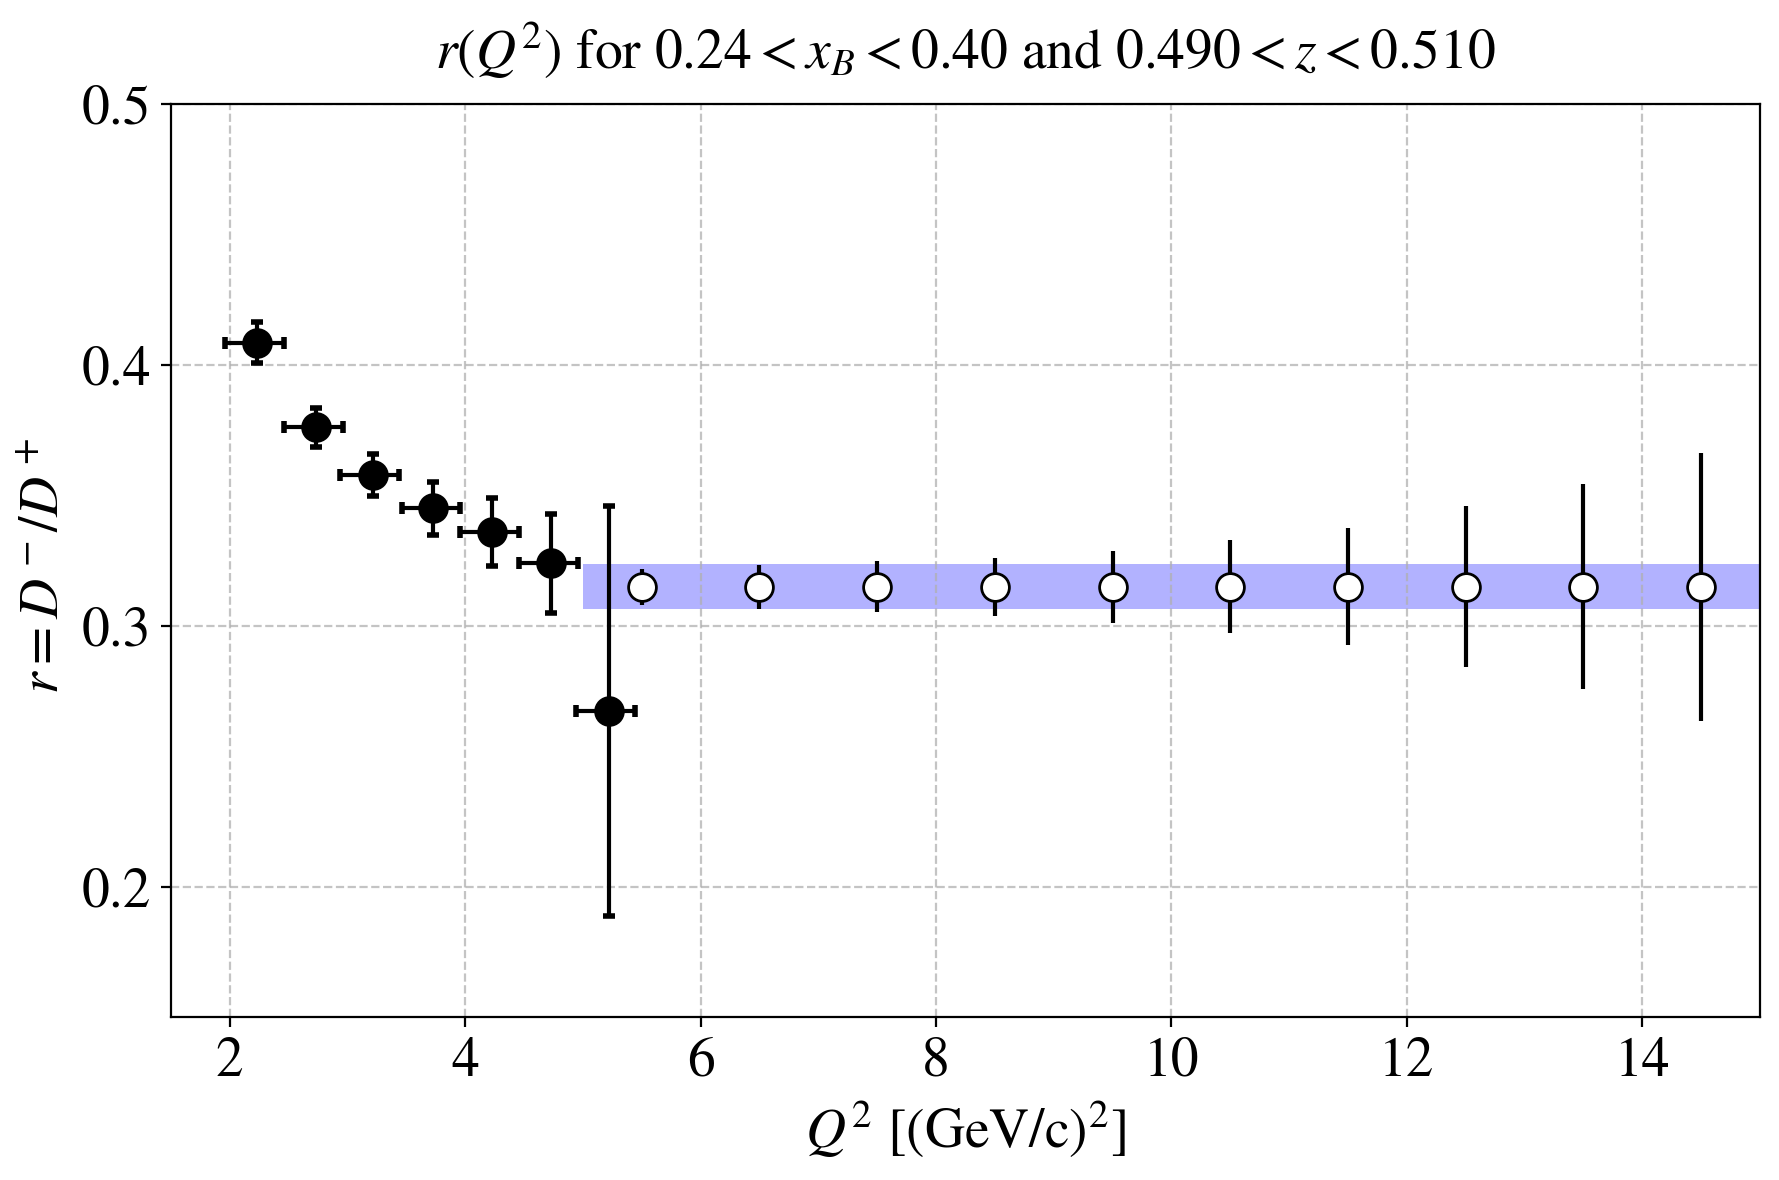

In [196]:
fig = plt.figure(figsize=(9,6), tight_layout=True)
ax = fig.add_subplot(1,1,1)
# plot_existing_data('r(Q^2,x=x0,z=z0)',x0=xB_selected,z0=z_selected)
plot_FF_expectation(ax=ax,formula='r(Q^2,x=x0,z=z0)',x0=xB_selected,z0=z_selected,delta_z=delta_z,Q2=np.linspace(5,15,100))
plt.errorbar(x = mean_Q2_arr,
             xerr = (Q2_errup,Q2_errdw),
             y    = r_vs_Q2,
             yerr = (r_vs_Q2_errdw,r_vs_Q2_errup),
             markersize=10,
             marker='o',markeredgecolor='k',linestyle='None',
             color='k',markerfacecolor='k',
             capthick=2, capsize=2)


set_axes(ax,'$Q^2$ [(GeV/c)$^2$]',
         "$r =D^-/D^+$ ",
         title  = "$r(Q^2)$ for $%.2f < x_B < %.2f$ and $%.3f < z < %.3f $ "%(xB_selected-Delta_xB,xB_selected+Delta_xB ,z_selected-delta_z, z_selected+delta_z),
         do_add_grid=True, do_add_legend=False, 
         # xlim=(0.9,7), ylim=(0,1),
         xlim=(1.5,15),
         ylim=(0.15,0.5),
         fontsize=20, yticks=(0.2,0.3,0.4,0.5,0.6));

# Add simulated data by Harut A., Jan-20, 2023 for JLAB 22 GeV
plt.errorbar(x = Sim_22GeV_024_x_040_z_05['Q2'][3:],
             y = (1-z_selected)/(1-z_selected+z_selected/0.46)*np.ones(len(Sim_22GeV_024_x_040_z_05[3:])),#Sim_22GeV_024_x_040_z_05['r'],
             # y = Sim_22GeV_024_x_040_z_05['r'],
             yerr = [Sim_22GeV_024_x_040_z_05['r_errup'][3:],Sim_22GeV_024_x_040_z_05['r_errdw'][3:]],
             markersize=10,
             marker='o', markerfacecolor='w',markeredgecolor='k', color='k',
             linestyle='');

# plt.legend(bbox_to_anchor=(1.,1.05),fontsize=20)